In [1]:
import pandas as pd
import string
from nltk import word_tokenize
from nltk.corpus import stopwords
from textblob import TextBlob # for sentiment analysis
from collections import Counter 
import seaborn as sns
import matplotlib.pyplot as plt
%matplotlib inline
import os
os.path.isfile('Friends_Pilot-Analysis.csv')

False

In [2]:
# Load Dataset

df = pd.read_csv('Book4.csv',encoding='utf-8')

In [3]:
# Provides Concise Summary of our Dataset

df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 305 entries, 0 to 304
Data columns (total 2 columns):
character    305 non-null object
text         303 non-null object
dtypes: object(2)
memory usage: 4.9+ KB


In [4]:
#Clear unwanted characters
df = df[df['character'] != '[Scene']
df = df[df['character'] != 'Customer']
df = df[df['character'] != 'Commercial Break']
df = df[df['character'] != 'Waitress']
df = df[df['character'] != 'End']
df = df[df['character'] != 'Ross and Rachel']


In [5]:
# Create Word Count Column
df['word_count'] = df['text'].str.split().str.len()
#print(df.character.value_counts().iloc[:8].index)

# Which Character has most lines?

Text(0.5, 1.0, 'Friends: Character Line Count')

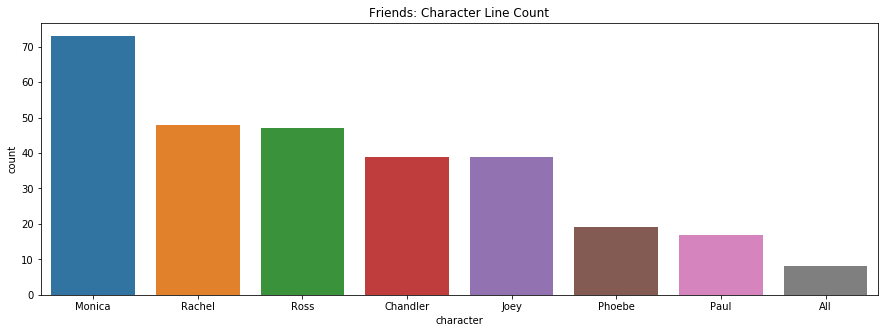

In [6]:
plt.figure(figsize=(15,5))
sns.countplot(x = 'character', data = df, order = df.character.value_counts().iloc[:8].index)
plt.title('Friends: Character Line Count')

# Which Character uses most words on average?

Text(0.5, 1.0, 'Friends : Average Character Word Counts')

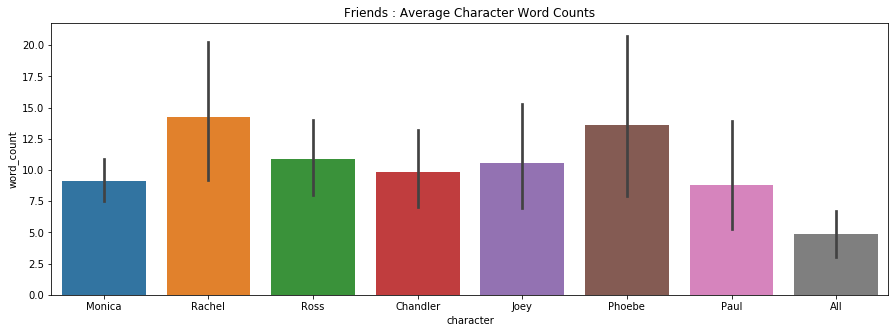

In [7]:
plt.figure(figsize=(15,5))
sns.barplot(x='character',y='word_count',data=df, order = df.character.value_counts().iloc[:8].index)
plt.title('Friends : Average Character Word Counts')

# Which character uses the most words in total?

In [8]:
total_sum = df.groupby(['character'])['word_count'].sum().reset_index()
#print(total_sum)

In [9]:
total_sum = total_sum.sort_values(by='word_count', ascending=False)
#print(total_sum)

Text(0.5, 1.0, 'Friends : Total Character Word Counts')

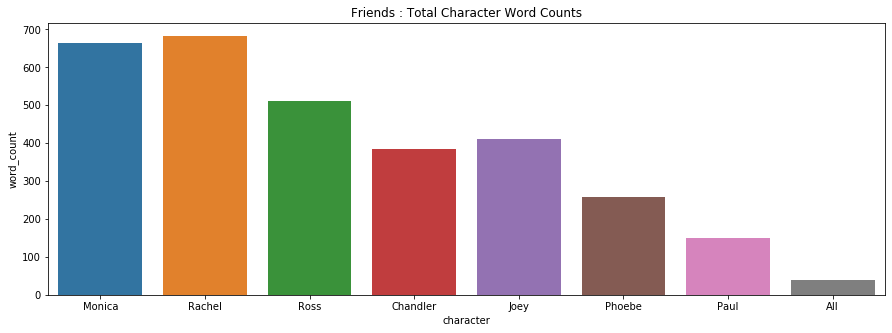

In [10]:
plt.figure(figsize=(15,5))
sns.barplot(x='character',y='word_count', data=total_sum, order = df.character.value_counts().iloc[:8].index)
plt.title('Friends : Total Character Word Counts')

In [11]:
# Pre Processing
# Clean and Normalize Text
# - tokenize
# - lowercase
# - remove punctuation
# - remove numeric characters
# - remove stopwords

stopwords = set(stopwords.words('english'))
#df['text'].dropna(inplace=True)
#df['new_text'] = df['text'].apply(word_tokenize)

def clean(text):
    text = str(text)
    text = word_tokenize(text)
    text = [word.lower() for word in text]
    punct = str.maketrans('', '', string.punctuation) 
    text = [word.translate(punct) for word in text] 
    text = [word for word in text if word.isalpha()]
    text = [word for word in text if not word in stopwords]
    return " ".join(text)

df['clean_text'] = df['text'].apply(clean)

In [12]:
# Create Word Count Column for Clean Text

df['clean_word_count'] = df['clean_text'].str.split().str.len()
print(df['clean_text'])

0                                  nothing tell guy work
1                  cmon going guy got ta something wrong
2                    right joey nice hump hump hairpiece
3                                         wait eat chalk
4                          cause nt want go went carl oh
                             ...                        
298                                              serving
299                                 yeah yeah cup coffee
300                             kids new dream las vegas
302    ugh excuse could give guy go ahead thank sorry...
303                          okay las vegas liza minelli
Name: clean_text, Length: 297, dtype: object


# Total Words vs Clean Words

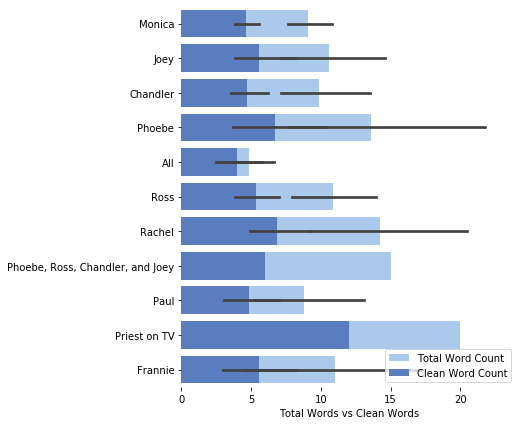

In [13]:
f, ax = plt.subplots(figsize=(6, 7))

sns.set_color_codes("pastel")
sns.barplot(x="word_count", y="character", data=df,
            label="Total Word Count", color="b")

sns.set_color_codes("muted")
sns.barplot(x="clean_word_count", y="character", data=df,
            label="Clean Word Count", color="b")

ax.legend( loc="lower right", frameon=True)
ax.set(xlim=(0, 24), ylabel="",
       xlabel="Total Words vs Clean Words")
sns.despine(left=True, bottom=True)

In [14]:
# Apply Sentiment Polarity to Text with TextBlob

df['polarity'] = [round(TextBlob(word).sentiment.polarity, 2) for word in df['clean_text']]
print(df)
df['sentiment'] = ['positive' if polarity > 0 
                             else 'negative' if polarity < 0 
                                 else 'neutral' 
                                     for polarity in df['polarity']]

    character                                               text  word_count  \
0      Monica   There's nothing to tell! He's just some guy I...          11   
1        Joey   C'mon, you're going out with the guy! There's...          14   
2    Chandler   All right Joey, be nice.  So does he have a h...          16   
3      Phoebe                           Wait, does he eat chalk?           5   
4      Phoebe   Just, 'cause, I don't want her to go through ...          16   
..        ...                                                ...         ...   
298    Rachel                               I'm just serving it.           4   
299       All             Yeah. Yeah, I'll have a cup of coffee.           8   
300  Chandler              Kids, new dream... I'm in Las Vegas.            7   
302    Rachel   Ugh.  Excuse me, could you give this to that ...          20   
303  Chandler    Okay, so, I'm in Las Vegas... I'm Liza Minelli-           9   

                                       

# What is the sentiment of our character's lines

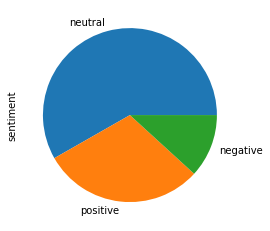

In [15]:
df.sentiment.value_counts().plot(kind='pie')

In [16]:
# Build a counter function to count words

def counter(text):
    cnt = Counter()
    for msgs in text:
        for msg in msgs:
            cnt[msg] += 1
    return cnt

In [17]:
# Isolate Monica's Lines and use Counter to determine the Most Common Words

import sys

if not sys.warnoptions:
    import warnings
    warnings.simplefilter("ignore")

monica = df.groupby('character')
monica = monica.get_group(('Monica'))
monica['clean_text'] = monica['clean_text'].apply(lambda x: word_tokenize(x))
text_cnt = counter(monica['clean_text'])
m = text_cnt.most_common()

# What are Monica's Most Common Words

Text(0.5, 1.0, "Monica's Most Common Words")

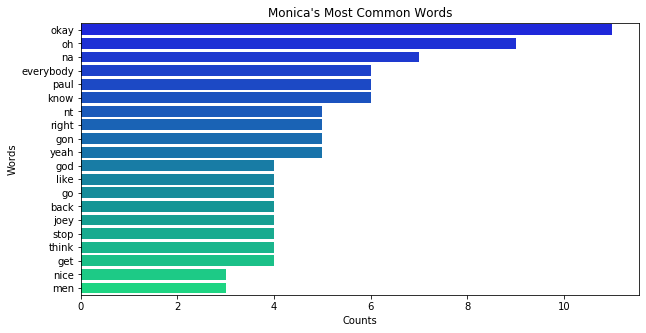

In [34]:
m = pd.DataFrame(m, columns = ['Words', 'Counts'])
m = m.sort_values(by='Counts', ascending=False)[:20]
colors = sns.color_palette("winter", len(m))
plt.figure(figsize=(10,5))
sns.barplot(y = 'Words', x = 'Counts', data=m, palette=colors)
plt.title('''Monica's Most Common Words''')

# What are Joey's Most Common Words

In [ ]:
#Isolate Joey's Lines and plot
joey = df.groupby('character')
joey = joey.get_group(('Joey'))
joey['clean_text'] = joey['clean_text'].apply(lambda x: word_tokenize(x))
joey_cnt = counter(joey['clean_text'])
j = joey_cnt.most_common()
j = pd.DataFrame(j, columns = ['Words', 'Counts'])
j = j.sort_values(by='Counts', ascending=False)[:20]

colors = sns.color_palette("gnuplot", len(j))
plt.figure(figsize=(10,5))
sns.barplot(y = 'Words' , x = 'Counts', data=j, palette=colors)
plt.title('''Joey's Most Common Words''')


# Chandler 's most common words

In [ ]:
chan = df.groupby('character')
chan = chan.get_group(('Chandler'))
chan['clean_text'] = chan['clean_text'].apply(lambda x: word_tokenize(x))
chan_cnt = counter(chan['clean_text'])
c = chan_cnt.most_common()
c = pd.DataFrame(c, columns = ['Words', 'Counts'])
c = c.sort_values(by='Counts', ascending=False)[:20]

colors = sns.color_palette("YlGnBu", len(c))
plt.figure(figsize=(10,5))
sns.barplot(y = 'Words' , x = 'Counts', data=j, palette=colors)
plt.title('''Chandler's Most Common Words''')

# Ross 's most common words

Text(0.5, 1.0, "Ross's Most Common Words")

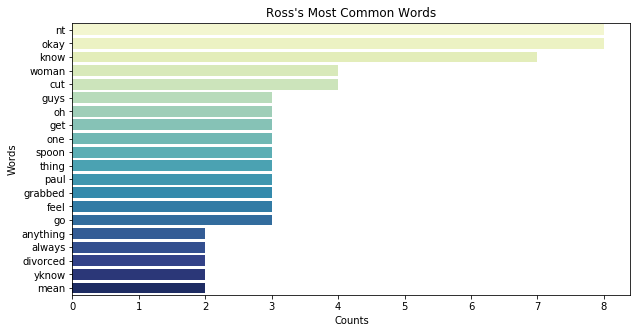

In [35]:
ross = df.groupby('character')
ross = ross.get_group(('Ross'))
ross['clean_text'] = ross['clean_text'].apply(lambda x: word_tokenize(x))
ross_cnt = counter(ross['clean_text'])
r = ross_cnt.most_common()
r = pd.DataFrame(r, columns = ['Words', 'Counts'])
r = r.sort_values(by='Counts', ascending=False)[:20]

colors = sns.color_palette("YlGnBu", len(r))
plt.figure(figsize=(10,5))
sns.barplot(y = 'Words' , x = 'Counts', data=r, palette=colors)
plt.title('''Ross's Most Common Words''')

# Phoebe 's most common words

Text(0.5, 1.0, "Phoebe's Most Common Words")

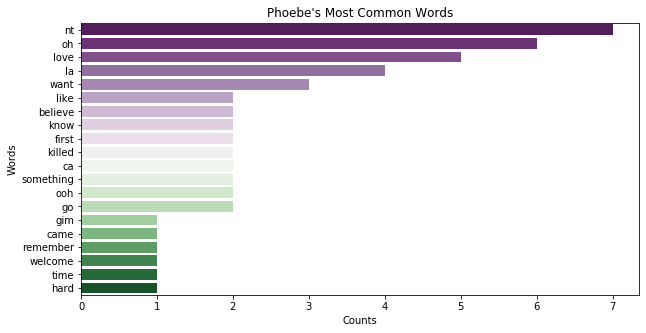

In [37]:
phoebs = df.groupby('character')
phoebs = phoebs.get_group(('Phoebe'))
phoebs['clean_text'] = phoebs['clean_text'].apply(lambda x: word_tokenize(x))
phoebs_cnt = counter(phoebs['clean_text'])
p = phoebs_cnt.most_common()
p = pd.DataFrame(p, columns = ['Words', 'Counts'])
p = p.sort_values(by='Counts', ascending=False)[:20]

colors = sns.color_palette("PRGn", len(r))
plt.figure(figsize=(10,5))
sns.barplot(y = 'Words' , x = 'Counts', data=p, palette=colors)
plt.title('''Phoebe's Most Common Words''')